<a href="https://colab.research.google.com/github/michaelJwilson/desihigh/blob/lyaforest/Lymanalphaforest_explorers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Here we load in a bunch of libraries we've seen before! 
import  os
import  sys
import  glob
import  numpy             as np
import  scipy.optimize    as op
import  matplotlib.pyplot as plt

from    IPython.display   import YouTubeVideo 
from    astropy.table     import Table

In [2]:
# For our friends running on Google Colab - remember to 
# mount your drive for all notebooks other than Colab.ipynb
# 
# Safely ignore otherwise!
sys.path.append('/content/drive/MyDrive/desihigh/')

In [21]:
# import  pubplot

from    tools.legacy import cutout

# The Forest Explorers

Perhaps you've been to a forest like California's famous sequoia, or coniferous, forest, or have at least seen some beautiful pictures of these 1-2000 year old trees!

<img src="https://github.com/michaelJwilson/desihigh/blob/lyaforest/desihigh/images/TropicalForest.jpg?raw=1" alt="Drawing" style="width: 1000px;"/>

One thing you may have noticed is they grow very close together and their density is particuarly high.  Thanks to their incredible height (60-200 feet), thick trunks and roots extending 100s of meters below the surface they're truly fascinating!

In this notebook, we'll explore the largest forests in the Universe, 'the Lyman-$\alpha$ forest', which make Sequoias look like minnows =) 

In 1970, by dedicatedly staring at the spectra of very distant quasars, the astronomer Roger Lynds noticed a large number of 'absorption lines', significant dips in the observed spectrum with no known explanation.

![title](desihigh/images/Lynds.jpg)

Photo credit:  NOIRLab/NSF/AURA

In particular, in the wavelength range between Lyman-$\alpha$ (Ly$\alpha$), at $121.6 {\rm nm} $, and Lyman-$\beta$(Ly$\beta$), at $102.6 {\rm nm}$. The first two of the lines in Lyman's series; remember, we saw this in the DESI notebook!

Some absorption lines were wider than the others, and densely covering the range.  It occurred to Lynds that the set of absorption lines resembled a forest and hence the name was fixed forever!  But what had he discovered?

Quasars (sometimes abreviated as QSOs) are galaxies hosting a supermassive black hole.  Matter dragged in by the immense gravitational pull of the black hole forms a narrow accretion disk (perhaps you can think why!) such that the surrounding gas gets incredibly hot and starts to emit a large amount of radiation.

Powered by the supermassive black hole, it is possible to observe QSOs at really large distances due to their luminosity, or intrinsic brightness.  The incredible strength of gravity around a black hole forces them to be the most __compact__ and dense known and, as we see light from only the hottest regions close to the black hole, they appear point-like in images of the night sky.  Often, we confuse them with stars at much closer distances!

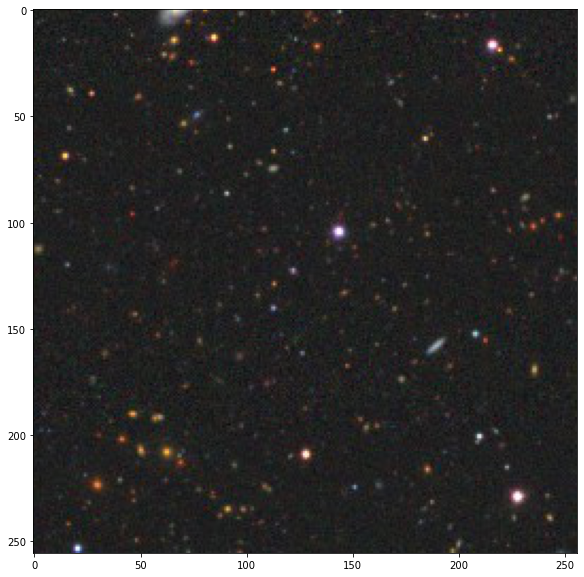

In [7]:
# TODO:  Add an appropriate circle in the center that 
#        circles the object of interest (in cutout).
fig, axes  = plt.subplots(1, 1, figsize=(15., 10))
url        = cutout(axes, 201.75, 7.15, scale=1)

But, the unique physics of distant quasars makes their spectre very distinctive.  They contain strong emission lines, such as Ly$\alpha$ line, and more distant ones contain many more absorption lines than closer ones.  You'll soon find out why! 

These absorptions can be interpreted as the same Ly-$\alpha$ transition, but observed at a smaller wavelength and therefore at a lower redshift than the quasar emitting the source light (and the Ly-$a\plha$ line emission). 

As light from the source quasar travelled towards us it was 'redshifted' by the expansion of the Universe and became absorbed by the Ly-$a\lpha$ transition in dense regions of hydrogen found along its path.  As observers, we refer this path to the line-of-sight, which is shown in more detail in the video below:

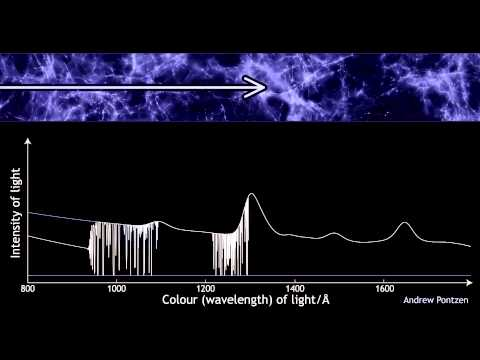

In [9]:
YouTubeVideo('6Bn7Ka0Tjjw')

¡Cool eh!  ¿Have you heard about $\pi$-day (3/14)? Well, we also have a Ly$\alpha$-day (12/16), as we celebrated on twitter with ...

![lemonalpha](https://pbs.twimg.com/media/EpYAU-2XYAE8SEQ?format=jpg&name=900x900 "lemon")

Alfalfa!  ;)  Now, lets get serious!

The absorptions detected in the spectra of distant quasars can be used as a direct tracer of matter, Hydrogen, like the distribution of quasars and galaxies, also traces the distribution of mass in the Universe. 

The more hydrogen clouds in the Universe, the more absorption lines we'll observe.  As well, there is more hydrogen where there is more dark matter!  So, detecting the Ly$\alpha$ absorptions allow us to infer how matter is distributed in the Universe, and how that distribution changes with time.

By observing more that 700,000 distant quasars, DESI with dwarf datasets to date and revolutionse our studies of the Lyman$\alpha$ forest. By identifying the forest for each of these QSOs we can also measure with very high accuracy how fast the Universe has expanded at points in the past, by looking for our old friend the 'BAO' peak.

Without further ado, lets begin an exploration of DESI's forests!

We'll start with the spectra DESI has made available for outreach, which we've seen before in the DESI.ipynb notebook.  Soon, all data DESI has observed in 'survey validation' will be available for you to study! 

In [10]:
#In the  https://github.com/michaelJwilson/desihigh/DESI.ipynb notebook we learned how to access the data for quasars.
qso_tile    = 68002
redshifts   = Table()
spectra     = Table()

# Read the spectra ("coadd-") and redshift ("zbest-") files
redshifts   = Table.read('desihigh/student_andes/zbest-qso-68002-20200315.fits')
spectra     = Table.read('desihigh/student_andes/coadd-qso-68002-20200315.fits')

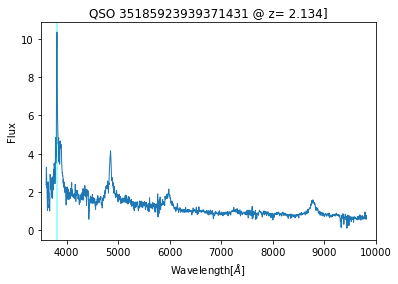

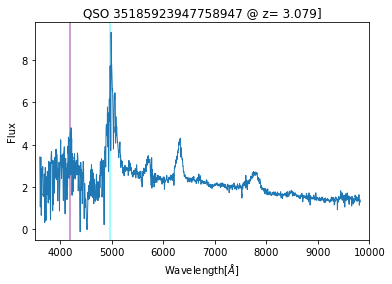

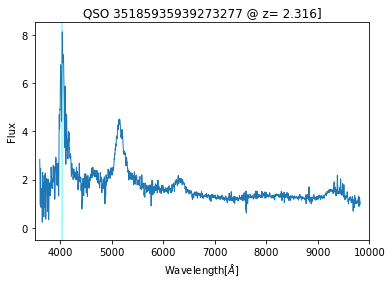

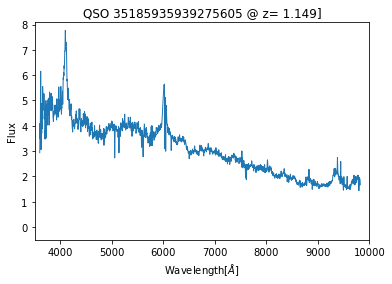

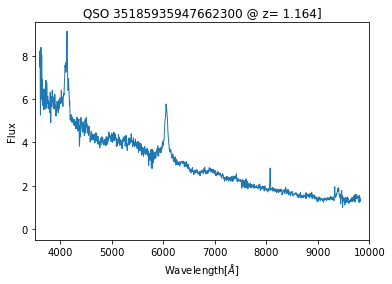

<Figure size 432x288 with 0 Axes>

In [12]:
# Define the Lyman-alpha and Lyman-beta rest wavelengths in Angtroms.
# TODO:  Call Rydberg.
Lya = 1215.67
Lyb = 1026.0

# Lets plot the spectra of all QSOs.  We add vertical lines to show the Lyman alpha and Lyman beta emission lines, 
# at the given redshift.
for i, tid in enumerate(redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    
    plt.axvline((1. + redshift) * Lya, c='cyan', alpha=0.5)
    plt.axvline((1. + redshift) * Lyb, c='purple', alpha=0.5)
    plt.plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
    plt.title('QSO {} @ z= {:.3f}]'.format(tid, redshift))
    plt.xlim(3.5e3,1.e4)
    plt.ylim(bottom=-0.5)
    plt.ylabel('Flux')
    plt.xlabel('Wavelength[$\AA$]')
    plt.show()
    plt.clf()


It seems the Ly$\alpha$ emission line is only visible for the first three quasars.  For the first and third, there seems to be a few aborption lines present, but the Ly$\beta$ emission line is only visible for the second one. The three quasars are at redshift above 2.1, so meet the condition to observe a forest in DESI quasars!

Lets look in more detail by selecting only quasars with z>2.1, and plot them again, but now highligting the region between the region between Ly$\alpha$ and Ly$\beta$.

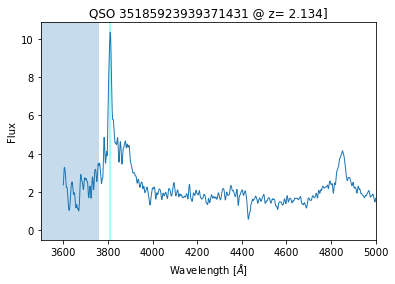

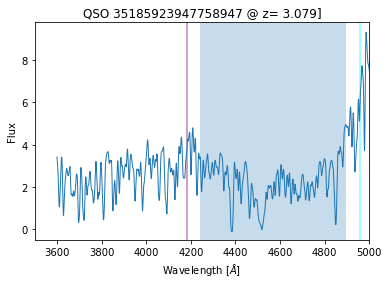

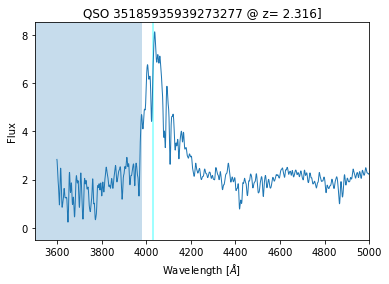

<Figure size 432x288 with 0 Axes>

In [13]:
# Lya forest wavelength range
lambda_min = 1040
lambda_max = 1200

# Select only QSOs with z>2.1 
islya         = redshifts['Z']>2.1
lya_redshifts = redshifts[islya]

for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]

    # Add a vertical line to show the Lya and Lyb emmision lines 
    plt.axvline((1. + redshift) * Lya, c='cyan', alpha=0.5)
    plt.axvline((1. + redshift) * Lyb, c='purple', alpha=0.5)
    plt.axvspan((1. + redshift) * lambda_min,(1. + redshift) * lambda_max,alpha=0.25)
    plt.plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
    plt.title('QSO {} @ z= {:.3f}]'.format(tid, redshift))
    plt.xlim(3.5e3, 5.0e3)
    plt.ylim(bottom=-0.5)
    plt.ylabel('Flux')
    plt.xlabel('Wavelength [$\AA$]')
    plt.show()
    plt.clf()

Yes!  Definetely there are some absorptions, as shown by the shaded region with the Ly$\alpha$ forest.

You may be wondering, how do we know those are really absorption lines and not the same noise we see elsewhere in the spectra?

Well, that is why we need high quality spectra for forest studies.  The longer our telescope captures light, the more photons we recieve and the less noise we will have in the spectra and the real absorptions will become clear.  

This gif shows how the noise in our spectra reduces as we add observations of the same object, and gain a longer exposure time.

![lyaforest](desihigh/images/lya_desihigh.gif "lyaforest")

Do you notice the huge absorption at ~4500 Angstrom?  It's quite likely it corresponds to what is called a \Damped Lyman alpha absorber' (DLA), which is produced by a particularly high density Hydrogen region. 

We could dedicate a full study to this special type of absorption, but for the purpose of using the forest for cosmology these thicker lines are difficult to understand and we usually remove them from the forest. 

Like DLAs, there are other types of absorptions that do not really correspond to the Ly$\alpha$ ones we look for, so we have to spend some time understanding and identifying which absorptions are useful and which not, and try to remove or model them ... but, luckly, we don't do that by eye! 

Can you think of a way to identiy DLAs that is quick and easy?

Well, while you design a method to help us out, lets keep it simple and extract the forest regardless of the contaminants that may be in there. 

For this, we need to select only the wavelength range that lies between the Ly-$\alpha$ and Ly-$\beta$ region.

In [14]:
for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    tmp=spectra['TARGET{:d}'.format(tid)].copy()
    wave_cut=(spectra['WAVELENGTH']>(1. + redshift) * lambda_min) & (spectra['WAVELENGTH']<(1. + redshift) * lambda_max)
    tmp[~wave_cut]=np.nan
    spectra['FOREST{:d}'.format(tid)]=tmp

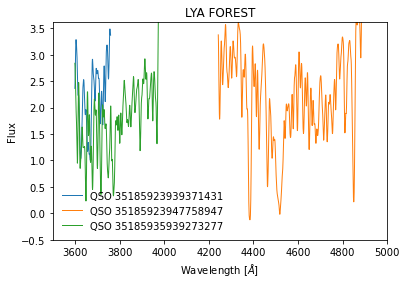

In [16]:
for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    plt.plot(spectra['WAVELENGTH'], spectra['FOREST{:d}'.format(tid)], lw=1, label=f'QSO {tid}')
    plt.title("LYA FOREST")
    xmin,xmax=min(spectra[spectra['FOREST{:d}'.format(tid)]!=0]["WAVELENGTH"]),min(spectra[spectra['FOREST{:d}'.format(tid)]!=0]["WAVELENGTH"])
    
    plt.ylim(bottom=-0.5)
    plt.ylabel('Flux')
    plt.xlabel(r'Wavelength [$\AA$]')
    
plt.xlim(3500,5000)
plt.legend(frameon=False)

DONE!  We have found the forests! What's next?

We can see there are regions of the spectra where it looks more or less absorbed than on average.  This is because there was more or less Hydrogen (i.e more or less matter) than average. We have some overflux, and underflux, with respect to the mean level.  This is what we usually call the 'flux transmission field', aka  'deltas', which can be computed for each quasar with the following equation:

1 + $\delta_q(\lambda)=\frac{f_q(\lambda)}{\bar{F}(\lambda) C_q(\lambda)}$,

where $f_q$ is the observed flux for each quasar and $\bar{F}(\lambda)C_q(\lambda)$ is our estimate of the mean transmited flux we'd see if the Ly$\alpha$ absorption was the same everywhere, i.e. a constant density of Hydrogen.

$C_q(\lambda)$ represents the unabsorbed quasar continuum - the flux we would have observed if there was no Hydrogen to absorbing light along the line-of-sight.  It's not easy to determine this from the quasar spectra without knowing the mean transmission, $\bar{F}(\lambda)$.

But not everything is lost!  A clever scientist (who, you might ask?) realized that we can model the mean transmited flux by a straight line in $\log \lambda$! as follows: 

$\bar{F}(\lambda) C_q(\lambda)= \bar{C} (\lambda_{RF}) (a_q+b_q\log{\lambda})$

where $\bar{C}(\lambda_{RF})$ is now the mean continuum, the average of all the quasar continua, in the restframe, which we have to determine. 

Here comes another approximation, lets think for a moment that $\bar{C}(\lambda_{RF})=1$, in this case we are only left to determine the $a_q$ and $b_q$ for each quasar, which we can do by fitting a straight line to the flux in the forest region. 

If we go this route we can have a first approximation of the "deltas"!



In [17]:
# Continuum fitting - define the chisquare function, that is just the difference betwwen the date and some model prediction for a given set of parameters. 
def chisq(model_params,model,data):
    model_data = model(model_params)
    chi = (data-model_data)**2
    return np.sum(chi[~np.isnan(chi)])

# Define a function that minimizes the chisquare as function of the free parameters. This allows us to find the parameters that best describe our data
def fit_spectra(model,tid):
    results = op.minimize(chisq,[0,0],args=(model,spectra['FOREST{:d}'.format(tid)]))
    return results.x

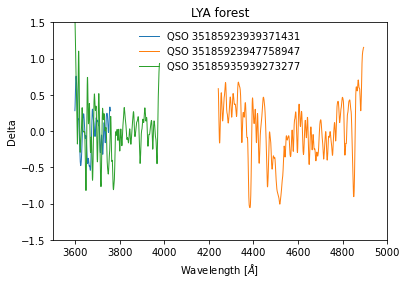

In [19]:
for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    plt.title("LYA forest")
    
    # Here we define the model for the mean transmited flux, see equation above.
    # model_params[0] and model_params[1] represent a_q and b_q respectively
    
    meanC=1
    model = lambda model_params: meanC*model_params[0] + model_params[1]*np.log10(spectra['WAVELENGTH'])
    a_q,b_q = fit_spectra(model,tid)
    best_model = model([a_q,b_q])
    nans= np.isnan(spectra['FOREST{:d}'.format(tid)])
    plt.plot(spectra['WAVELENGTH'][~nans], spectra['FOREST{:d}'.format(tid)][~nans]/best_model[~nans]-1, lw=1, label=f'QSO {tid}')
    
    plt.ylim(bottom=-1)
    plt.ylabel('Delta')
    plt.xlabel(r'Wavelength [$\AA$]')
    
plt.xlim(3500,5000)
plt.ylim(-1.5,1.5)
plt.legend(frameon=False)

How could we get a better estimation of the "deltas"?  It's time to get your thinking cap on and try out your own ideas!

Once we have the "deltas", and we are happy with the estimation, we are left to use them to calculate how fast the Universe is expanding. But we will leave that for another day. Have fun!

In [22]:
# TODO: Alma and the gang, desihigh ...